In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


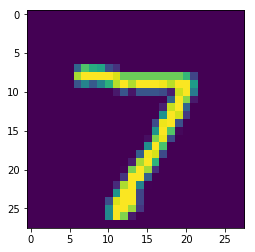

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#plt.imshow(x_train[0])
plt.imshow(x_test[0])

In [4]:
num_class = 10
epoch = 3
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [5]:
cnn = Sequential()

In [6]:
cnn.add(Conv2D(32, kernel_size = (5,5), input_shape = (28,28,1), padding = 'same', activation = 'relu'))

In [7]:
cnn.add(MaxPooling2D())

In [8]:
cnn.add(Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu'))

In [9]:
cnn.add(MaxPooling2D())

In [10]:
cnn.add(Flatten())

In [11]:
cnn.add(Dense(1024, activation = 'relu'))

In [12]:
cnn.add(Dense(10, activation = 'softmax'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [15]:
fit_cnn = cnn.fit(x_train, y_train, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 742s 12ms/step - loss: 0.0959 - accuracy: 0.9701 - val_loss: 0.0431 - val_accuracy: 0.9870
Epoch 2/5
60000/60000 [==============================] - 694s 12ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 3/5
60000/60000 [==============================] - 678s 11ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0286 - val_accuracy: 0.9914
Epoch 4/5
60000/60000 [==============================] - 663s 11ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 5/5
60000/60000 [==============================] - 656s 11ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0266 - val_accuracy: 0.9918


In [16]:
score = cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 23s 2ms/step


In [17]:
score

[0.026624102969517463, 0.9918000102043152]